In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
pd.options.display.max_columns = 50
pd.options.display.max_colwidth = 500
sns.set_style('whitegrid')


In [3]:
dataPath = ('H:\Document\Program\Harvard Data Science Course\HomeWork2013\content-master\content-master\data\\')
dataFile = 'restaurant_rating.csv'

In [123]:
train_OG = pd.read_csv(dataPath + dataFile)

In [397]:
train = train_OG.copy()

In [25]:
print(train.shape)
train.head(3)

(149319, 16)


,user_id,business_id,date,review_id,stars,usefulvotes_review,user_name,categories,biz_name,latitude,longitude,business_avg,business_review_count,user_avg,user_review_count,month
0,rLtl8ZkDX5vH5nAx9C3q5Q,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,5,Jason,"[Breakfast & Brunch, Restaurants]",Morning Glory Cafe,33.390792,-112.012504,3.87156,109,3.796954,197,1
1,SBbftLzfYYKItOMFwOTIJg,9yKzy9PApeiPPOUJEtnvkg,2008-05-04,DASdFe-g0BgfN9J2tanStg,5,1,Jennifer,"[Breakfast & Brunch, Restaurants]",Morning Glory Cafe,33.390792,-112.012504,3.87156,109,3.473684,57,5
2,mlBC3pN9GXlUUfQi1qBBZA,9yKzy9PApeiPPOUJEtnvkg,2010-07-05,W8CX2h_hmODWmgSJVbMifw,2,1,Jennifer,"[Breakfast & Brunch, Restaurants]",Morning Glory Cafe,33.390792,-112.012504,3.87156,109,3.702381,84,7


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149319 entries, 0 to 149318
Data columns (total 15 columns):
user_id                  149319 non-null object
business_id              149319 non-null object
date                     149319 non-null object
review_id                149319 non-null object
stars                    149319 non-null int64
usefulvotes_review       149319 non-null int64
user_name                149319 non-null object
categories               149319 non-null object
biz_name                 149319 non-null object
latitude                 149319 non-null float64
longitude                149319 non-null float64
business_avg             149319 non-null float64
business_review_count    149319 non-null int64
user_avg                 149319 non-null float64
user_review_count        149319 non-null int64
dtypes: float64(4), int64(4), object(7)
memory usage: 17.1+ MB


In [10]:
train.describe()

,stars,usefulvotes_review,latitude,longitude,business_avg,business_review_count,user_avg,user_review_count
count,149319.000000,149319.000000,149319.000000,149319.000000,149319.000000,149319.000000,149319.000000,149319.000000
mean,3.741413,1.349741,33.484835,-111.984559,3.741413,129.234987,3.741413,31.852082
std,1.185309,2.154615,0.109204,0.121524,0.486074,136.521707,0.711949,49.701214
min,1.000000,0.000000,32.876848,-112.875482,1.000000,1.000000,1.000000,1.000000
25%,3.000000,0.000000,33.422169,-112.065458,3.467649,37.000000,3.444444,3.000000
50%,4.000000,1.000000,33.492502,-111.963708,3.838710,82.000000,3.767442,11.000000
75%,5.000000,2.000000,33.538351,-111.923255,4.071749,170.000000,4.083333,39.000000
max,5.000000,82.000000,34.002867,-111.386046,5.000000,742.000000,5.000000,332.000000


In [13]:
train['date'] = pd.to_datetime(train['date'])

In [16]:
train['month'] = train['date'].apply(lambda d: d.month)

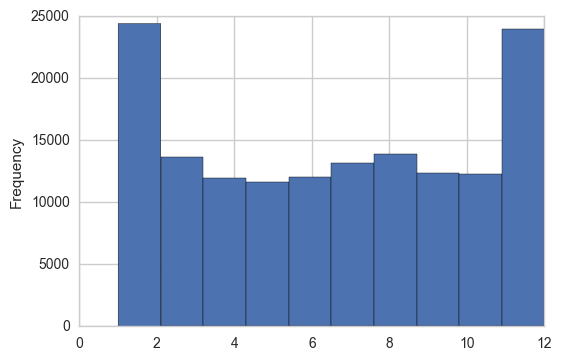

In [19]:
train['month'].plot(kind='hist');

In [20]:
len(train['business_review_count'].value_counts())

266

In [26]:
train.columns

Index(['user_id', 'business_id', 'date', 'review_id', 'stars',
       'usefulvotes_review', 'user_name', 'categories', 'biz_name', 'latitude',
       'longitude', 'business_avg', 'business_review_count', 'user_avg',
       'user_review_count', 'month'],
      dtype='object')

In [45]:
cnt = train.groupby(['business_review_count', 'business_id'])['business_id'].count()

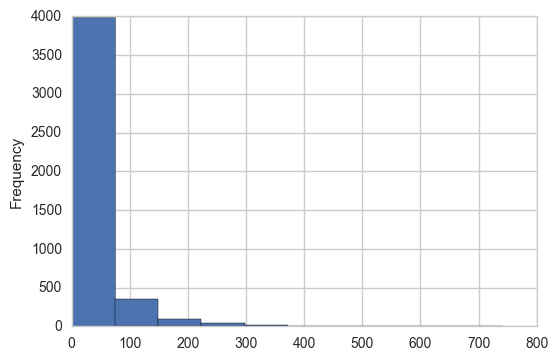

In [46]:
cnt.plot(kind='hist')

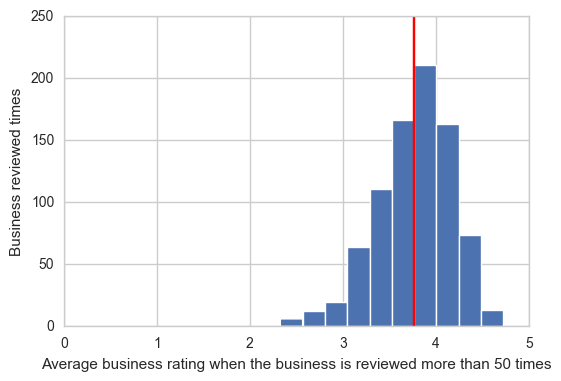

In [100]:
businessReviewTimes = train.groupby(['business_id', 'business_avg'])['business_id'].count()
businesReviewRates = train.groupby(['business_id', 'business_avg'])['business_avg'].mean()
#print(businessReviewTimes[businessReviewTimes > 10][0:10])
businesReviewRates[businessReviewTimes>50].hist(bins=10, edgecolor='w', lw=1)
plt.xlabel("Average business rating when the business is reviewed more than 50 times")
plt.ylabel("Business reviewed times")
plt.xticks([0, 1, 2, 3, 4, 5]);
plt.axvline(businesReviewRates[businessReviewTimes>50].mean(), 0, 200, color='red');

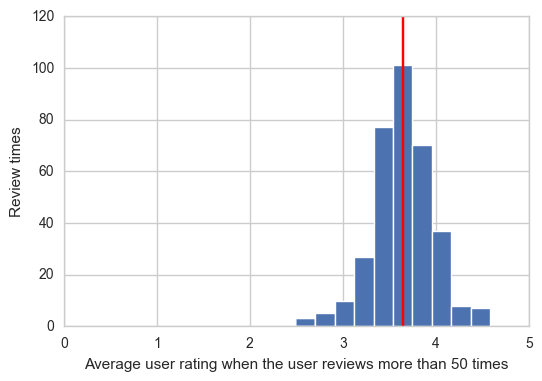

In [96]:
userReviewTimes = train.groupby(['user_id', 'user_avg'])['user_id'].count()
userReviewRates = train.groupby(['user_id', 'user_avg'])['user_avg'].mean()
#print(userReviewTimes[userReviewTimes > 50][0:10])
userReviewRates[userReviewTimes>50].hist(bins=10, edgecolor='w', lw=1)
plt.xlabel("Average user rating when the user reviews more than 50 times")
plt.ylabel("Review times")
plt.xticks([0, 1, 2, 3, 4, 5]);
plt.axvline(userReviewRates[userReviewTimes>50].mean(), 0, 200, color='red');

### Exploratory Data Analysis

**1.1** Visualize the sparsity of the full data set by plotting two histograms of the review count  grouped by the `user_id` and `business_id` respectively. Are there more users or more businesses? 

In [398]:
train.columns

Index(['user_id', 'business_id', 'date', 'review_id', 'stars',
       'usefulvotes_review', 'user_name', 'categories', 'biz_name', 'latitude',
       'longitude', 'business_avg', 'business_review_count', 'user_avg',
       'user_review_count'],
      dtype='object')

In [399]:
len(train['user_id'].value_counts())

34789

In [400]:
len(train['business_id'].value_counts())

4503

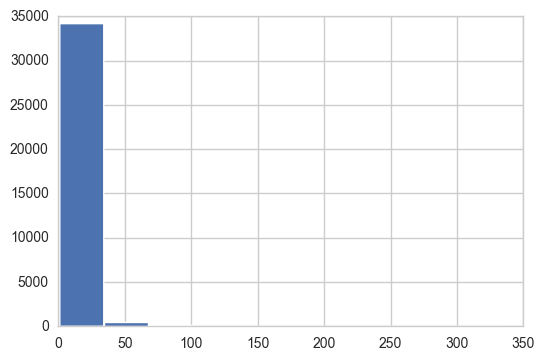

In [401]:
train.groupby(['user_id'])['review_id'].count().hist(bins=10, edgecolor='w', lw=1);


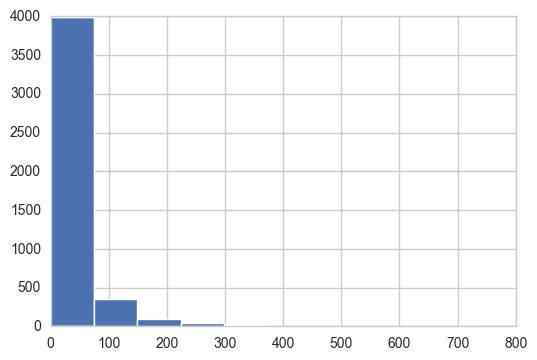

In [402]:
train.groupby(['business_id'])['review_id'].count().hist(bins=10, edgecolor='w', lw=1);

**1.2** Compute the average rating of reviews in the data set and a histogram of all the ratings in the dataset.

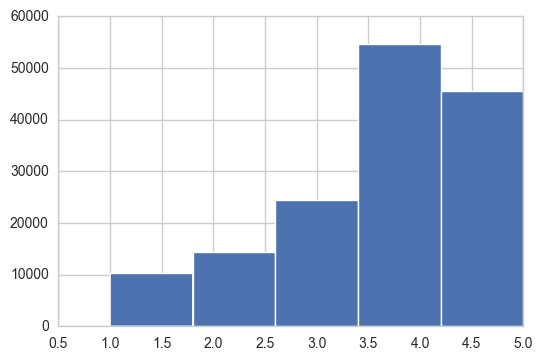

In [403]:
train['stars'].hist(bins=5, edgecolor='w', lw=1)

**1.3** Create a smaller data set in dataframe `smalldf` by looking for those businesses with more than 150 reviews and those users with more than 60 reviews. Include all the columns that were there in the parent dataframe. Since you have created a subset of the data set, use the method provided above to recalculate the averages. Print the number of unique users and items in this data set.  

Note that while this cut makes sure we have prolific users, the cut on businesses restores sparsity  by reducing the number of reviews per user.

In [404]:
train_subset = train[(train['business_review_count'] > 150) & (train['user_review_count'] > 60)]

In [405]:
train_subset.head(3)

,user_id,business_id,date,review_id,stars,usefulvotes_review,user_name,categories,biz_name,latitude,longitude,business_avg,business_review_count,user_avg,user_review_count
395,rLtl8ZkDX5vH5nAx9C3q5Q,eIxSLxzIlfExI6vgAbn2JA,2011-05-12 00:00:00,z4G1g3VcdfigCUtVDFRL1w,4,5,Jason,"[Burgers, Hot Dogs, American (New), Restaurants]",Lobbys Beef Burgers Dogs,33.39477,-111.908894,4.283237,173,3.796954,197
397,C6IOtaaYdLIT5fWd7ZYIuA,eIxSLxzIlfExI6vgAbn2JA,2011-04-12 00:00:00,480M-xDpRaA1gCVCqIG4WA,4,14,Daren,"[Burgers, Hot Dogs, American (New), Restaurants]",Lobbys Beef Burgers Dogs,33.39477,-111.908894,4.283237,173,3.784689,209
399,mlBC3pN9GXlUUfQi1qBBZA,eIxSLxzIlfExI6vgAbn2JA,2011-09-17 00:00:00,q_T6FtScTul_yYIGyrgTxA,3,0,Jennifer,"[Burgers, Hot Dogs, American (New), Restaurants]",Lobbys Beef Burgers Dogs,33.39477,-111.908894,4.283237,173,3.702381,84


In [411]:
def df_update_user_biz_avg(df):
    df_user_group = df.groupby('user_id')
    df_biz_group = df.groupby('business_id')
    
    user_view_count = df_user_group['review_id'].count()
    biz_view_count = df_biz_group['review_id'].count()
    
    star_user_group_Avg = df_user_group['stars'].mean()
    star_biz_group_Avg = df_biz_group['stars'].mean()
    
    df_update = df.copy()
    
    df_update.set_index(['user_id'], inplace = True)
    df_update['user_avg'] = star_user_group_Avg
    df_update['user_review_count'] = user_view_count
    df_update.reset_index(inplace = True)
    
    df_update.set_index(['business_id'], inplace = True)
    df_update['business_avg'] = star_biz_group_Avg
    df_update['business_review_count'] = biz_view_count
    df_update.reset_index(inplace = True)
    
    return df_update

In [412]:
train_subset_usrbiz_update = df_update_user_biz_avg(train_subset)
train_subset_usrbiz_update.head(3)

,business_id,user_id,date,review_id,stars,usefulvotes_review,user_name,categories,biz_name,latitude,longitude,business_avg,business_review_count,user_avg,user_review_count
0,eIxSLxzIlfExI6vgAbn2JA,rLtl8ZkDX5vH5nAx9C3q5Q,2011-05-12 00:00:00,z4G1g3VcdfigCUtVDFRL1w,4,5,Jason,"[Burgers, Hot Dogs, American (New), Restaurants]",Lobbys Beef Burgers Dogs,33.39477,-111.908894,4.04,25,3.709677,62
1,eIxSLxzIlfExI6vgAbn2JA,C6IOtaaYdLIT5fWd7ZYIuA,2011-04-12 00:00:00,480M-xDpRaA1gCVCqIG4WA,4,14,Daren,"[Burgers, Hot Dogs, American (New), Restaurants]",Lobbys Beef Burgers Dogs,33.39477,-111.908894,4.04,25,4.000000,15
2,eIxSLxzIlfExI6vgAbn2JA,mlBC3pN9GXlUUfQi1qBBZA,2011-09-17 00:00:00,q_T6FtScTul_yYIGyrgTxA,3,0,Jennifer,"[Burgers, Hot Dogs, American (New), Restaurants]",Lobbys Beef Burgers Dogs,33.39477,-111.908894,4.04,25,3.750000,12


How does this compare to the parent data set, in terms of size and sparsity? Once again, plot histograms of the review count grouped by user, and by the review count grouped by business, respectively, and describe the results

In [413]:
print('There are {0} reviews when we set a certain condition'.format(train_subset_usrbiz_update.shape[0]))
print('{0} reviews are given by {1} differnt users to {2} resturants'.format(train_subset_usrbiz_update.shape[0],
      len(train_subset_usrbiz_update['user_id'].unique()), len(train_subset_usrbiz_update['business_id'].unique())))

There are 6165 reviews when we set a certain condition
6165 reviews are given by 240 differnt users to 172 resturants


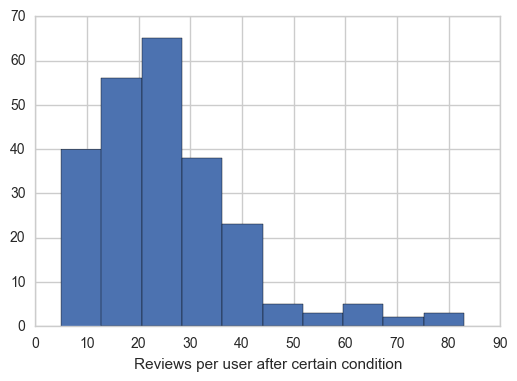

In [414]:
plt.hist(train_subset_usrbiz_update.groupby('user_id')['user_review_count'].count())
plt.xlabel('Reviews per user after certain condition');

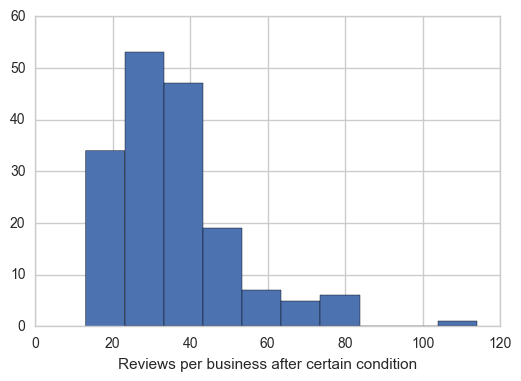

In [415]:
plt.hist(train_subset_usrbiz_update.groupby('business_id')['business_review_count'].count())
plt.xlabel('Reviews per business after certain condition');

Comparing to the Reviews per user given and Reviews per business received, after the condition selection, the data becomes less sparse, since the original data has steep decline in histogram over these two quantities, while with certatin condition the histograms tend to be more flatten.

**1.4** Compute histograms of the average user rating in the smaller data set, and the average business rating in the smaller data set. Print the overall mean.

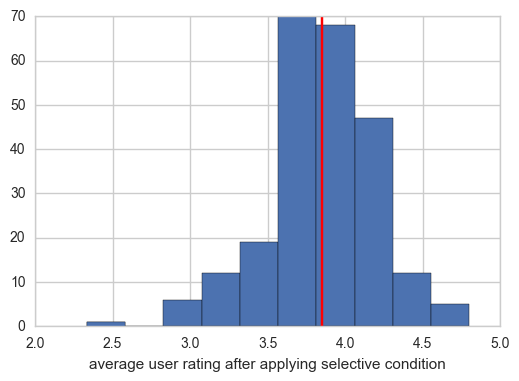

In [416]:
train_subset_usrbiz_update.groupby('user_id')['stars'].mean().hist(bins=10)
plt.axvline(train_subset_usrbiz_update.groupby('user_id')['stars'].mean().mean(), 0, 200, color='red')
plt.xlabel('average user rating after applying selective condition');

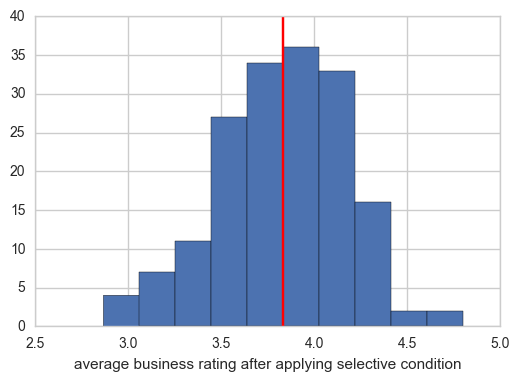

In [417]:
train_subset_usrbiz_update.groupby('business_id')['stars'].mean().hist(bins=10)
plt.axvline(train_subset_usrbiz_update.groupby('business_id')['stars'].mean().mean(), 0, 200, color='red')
plt.xlabel('average business rating after applying selective condition');

## 1. A global similarity based recommender

### Common Support

Lets now make a histogram of the common user support (the number of common reviewers) of each pair of restaurants on the smaller set, and print the mean. Pay attention to the code, as you will use parts of it later. (This code takes a bit of time to run, so be patient).

The common support is an important concept, as for each pair of restaurants, its the number of people who reviewed both. It will be used to modify similarity between restaurants. If the common support is low, the similarity is less believable.

In [418]:
a = [1,2,3,4,5]
b = [1,3,5,6]
print(set(a).intersection(b))
print('{0} entries exist both in list a and list b'.format(len(set(a).intersection(b))))

{1, 3, 5}
3 entries exist both in list a and list b


Mean support is: 6.84679722562


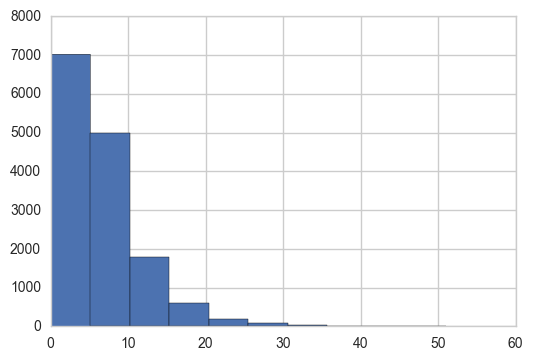

In [419]:
restaurants = train_subset_usrbiz_update['business_id'].unique()

supports=[]
for i, rest1 in enumerate(restaurants):
    for j, rest2 in enumerate(restaurants):
        if  i < j:
            rest1_reviewers = train_subset_usrbiz_update[train_subset_usrbiz_update.business_id==rest1]['user_id'].unique()
            rest2_reviewers = train_subset_usrbiz_update[train_subset_usrbiz_update.business_id==rest2]['user_id'].unique()
            common_reviewers = set(rest1_reviewers).intersection(rest2_reviewers)
            supports.append(len(common_reviewers))
            
print( "Mean support is:", np.mean(supports))
plt.hist(supports);

As you can see, even though we chose a subset of the dataframe in which every restaurant had 150 reviews and every user had at least made 60 reviews, the common support (users comment on pair-two resturants over all resturants considered) of most pairs of restaurants is really low, indeed less than 10!.

### Calculating Similarity

The function `get_restaurant_reviews` defined below takes a restaurant `business_id` and a set of users, and returns the reviews of that restaurant by those users. You will use this function in calculating a similarity function, in **1.5**.

In [439]:
#p1 = {'name': 'willy', 'age': 10}
#p2 = {'name': 'willy', 'age': 11}
#p3 = {'name': 'zoe', 'age': 10}
#df = pd.DataFrame([p1, p2, p3])
#print(df,'\n')
#print(df.duplicated('name'))
#df[df['name'].duplicated()==False]

In [425]:
def get_restaurant_reviews(df, biz_id, users):
    mask = (df['business_id'] == biz_id) & (df['user_id'].isin(users))
    df_biz_id_rate = df[mask]
    df_biz_id_rate = df_biz_id_rate[df_biz_id_rate['user_id'].duplicated() == False]
    
    #df_user_group = df.groupby('user_id')
    #df_biz_id_rate = df_user_group[(df_user_group['user_id'].users)][(df_user_group['business_id'] == biz_id)]
    #df_biz_id_rate = df_user_group[df_user_group['user_id'] == users]
    #df_biz_id_rate = df_biz_id_rate[df_biz_id_rate['business_id'] == biz_id]
    return df_biz_id_rate

In [426]:
#df = train.groupby('user_id')
#df['user_id'].apply(lambda usr: usr.isin(['rLtl8ZkDX5vH5nAx9C3q5Q']))

In [427]:
subUser = train_subset_usrbiz_update['user_id'][20:22]
get_restaurant_reviews(train, 'eIxSLxzIlfExI6vgAbn2JA', subUser)

,user_id,business_id,date,review_id,stars,usefulvotes_review,user_name,categories,biz_name,latitude,longitude,business_avg,business_review_count,user_avg,user_review_count
436,NvDR3SPVPXrDB_dbKuGoWA,eIxSLxzIlfExI6vgAbn2JA,2011-07-13 00:00:00,qUAKZgt-8Oa_C2FUslkqxw,2,3,Scott,"[Burgers, Hot Dogs, American (New), Restaurants]",Lobbys Beef Burgers Dogs,33.39477,-111.908894,4.283237,173,3.354610,141
441,iwZ_7QuZ1tzT6pIZmOlDQg,eIxSLxzIlfExI6vgAbn2JA,2012-03-16 00:00:00,czJpzENiE4bDsfe_OkBjPw,5,3,Larry,"[Burgers, Hot Dogs, American (New), Restaurants]",Lobbys Beef Burgers Dogs,33.39477,-111.908894,4.283237,173,3.594937,79


**1.5** Write a function `calculate_similarity` that operates between two restaurants and calculates a similarity for them, taking a dataframe and a similarity function `similarity_func`. An example of the `similarity_func` is the `pearson_sim` we defined above. `calculate_similarity` operates as follows: 

1. For each of the two restaurants, get the set of reviewers who have reviewed the restaurant and compute the intersection of these two sets. Also compute the number of common reviewers `n_common`.

2. Use the function `get_restaurant_reviews` defined below to get the reviews for each restaurant as made by these common reviewers. Notice that `get_restaurant_reviews` returns a sub data frame of reviews.

3. Calculate the similarity using `similarity_func` which takes the two reviews dataframes from part 2 and the number of common reviewers `n_common` as arguments

4. Return the similarity and `n_common` in a tuple `(sim, n_common)`. If the similarity is a `NaN`, set the similarity to 0.

In [291]:
from scipy.stats.stats import pearsonr

In [446]:
def calculate_similarity(df, resturant_1, resturant_2):
    rest_1_reviewer = df[df['business_id']==resturant_1]['user_id'].unique()
    rest_2_reviewer = df[df['business_id']==resturant_2]['user_id'].unique()
    
    common_usr = set(rest_1_reviewer).intersection(rest_2_reviewer)
    num_common_usr = len(common_usr)
    
    rest_1_review = df[(df['business_id'] == resturant_1) & (df['user_id'].isin(common_usr))]
    rest_1_review = rest_1_review[rest_1_review['user_id'].duplicated() == False]
    
    rest_2_review = df[(df['business_id'] == resturant_2) & (df['user_id'].isin(common_usr))]
    rest_2_review = rest_2_review[rest_2_review['user_id'].duplicated() == False]
    
    '''
    Even though each reviewer uses the same 5-star scale when rating restaurants, 
    comparing two users by comparing their raw user ratings can be problematic. 
    Consider a user whose average rating is 2. This is a curmudgeonly user. 
    Consider another whose average rating is 4. This is a rather enthusiastic one. 
    How should we compare a 3 rating by the curmudgeonly one to a 5 rating of the enthusiastic one?
    It is for this purpose that we must subtract the average rating of the user from the actual rating of the restaurants 
    in computing the similarity of two restaurants. This makes the above ratings by the two users comparable. 
    '''
    if num_common_usr == 0:
        similarity = 0
    else:
        # star quantifies how the current reviewer rates the underlying restaurant
        # user_avg quantifies what's the style of current reviewer generally rates
        rest_1_diff_review_star_reviewer_rateAvg = rest_1_review['stars'] - rest_1_review['user_avg']
        rest_2_diff_review_star_reviewer_rateAvg = rest_2_review['stars'] - rest_2_review['user_avg']
        similarity = pearsonr(rest_1_diff_review_star_reviewer_rateAvg, 
                              rest_2_diff_review_star_reviewer_rateAvg)[0]
        p_similarity = pearsonr(rest_1_diff_review_star_reviewer_rateAvg, 
                              rest_2_diff_review_star_reviewer_rateAvg)[1]
        if np.isnan(similarity):
            similarity = 0
    
    
    return (similarity, num_common_usr)

In [443]:
?pearsonr

In [447]:
calculate_similarity(train, 'WNy1uzcmm_UHmTyR--o5IA', 'xBCfrESSbroTjhVcRfG4NA')

(0.48148421546623382, 4)

### Making a database of similarities

We now move to calculating a global database of pairwise restaurant similarities.
We provide you here with a function to make a database of the similarities for each pair of restaurants in the database. The class `Database` is initialized in its constructor by taking as arguments a dataframe of reviews. The method `populate_by calculating` iterates over every possible pair of business_id's in the dataframe and populates the database with similarities and common supports. It takes as arguments a function the similarity function `similarity_func` like `pearson_sim` (`calculate_similarity` then uses this to calculate the similarity). The `get` method on the database can be used to retrieve the similarity for two business ids.

In [324]:
class reviewDB:
    # consturct a self-constructor
    def __init__(self, df):
        self.df = df
        # create a dict to store unique restaurant id
        self.uniqueRestaurantId = {restId: idx for (idx, restId) in enumerate(df['business_id'].unique())}
        numUniqueBiz = len(df['business_id'].unique())
        self.similarityMat = np.zeros((numUniqueBiz, numUniqueBiz))
        self.numCommonReviewer = np.zeros((numUniqueBiz, numUniqueBiz), dtype=np.int)
    
    # evaluate the similarity of restaurants in pair-wise
    def eval_similarity_numComm(self):
        # retrieve the dict for unique restaurants from self-constructor
        restaurants = self.uniqueRestaurantId.items()
        
        # loop-over 'items'--restaurant id and its index stored in dict
        for rest_1, idx_1 in restaurants:
            for rest_2, idx_2 in restaurants:
                if idx_1 < idx_2:
                    similarity = calculate_similarity(self.df, rest_1, rest_2)[0]
                    numCommonReviewer = calculate_similarity(self.df, rest_1, rest_2)[1]
                    self.similarityMat[idx_1][idx_2] = similarity
                    self.similarityMat[idx_2][idx_1] = similarity
                    self.numCommonReviewer[idx_1][idx_2] = numCommonReviewer
                    self.numCommonReviewer[idx_2][idx_1] = numCommonReviewer
                elif idx_1 == idx_2:
                    self.similarityMat[idx_1][idx_2] = 1
                    self.numCommonReviewer[idx_1][idx_2] = len(self.df[self.df['business_id'] == rest_1]['user_id'].unique())
    
    # return the infomation we want to evaluate from df
    def retrie_similarity_numComm(self, rest_1, rest_2):
        similarity = self.similarityMat[self.uniqueRestaurantId[rest_1]][self.uniqueRestaurantId[rest_2]]
        numComm = self.numCommonReviewer[self.uniqueRestaurantId[rest_1]][self.uniqueRestaurantId[rest_2]]
        return (similarity, numComm)

In [326]:
db=reviewDB(train_subset_usrbiz_update)
db.eval_similarity_numComm()

C:\Users\xinliu\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\stats.py:3029: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
C:\Users\xinliu\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\stats.py:5084: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0
C:\Users\xinliu\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\stats.py:3039: RuntimeWarning: invalid value encountered in double_scalars
  prob = _betai(0.5*df, 0.5, df/(df+t_squared))


In [331]:
db.retrie_similarity_numComm('UL3OMN_c-NXHlyb97pDifA', '-AAig9FG0s8gYE4f8GfowQ')

(-0.36100635467383579, 5)

### K-Nearest restaurants (in similarity)

We are now going to find the k-nearest restaurants to a given restaurant based on the database of similarities that we calculated. But we have a problem.

Consider the two cases where there is just one common reviewer, and where there are 40. In the former case, we might get a artificially high similarity based on the tastes of just this user, and thus we must reduce its importance in the nearest-neighbor calculation. In the latter case, we would get a much more unbiased estimator of the similarity of the two restaurants.

To control the effect of small common supports, we can **shrink** our pearson co-efficients. We shall do this by using the "regularization" parameter `reg`:

$$s_{mj} = \frac{N_{common}\, \rho_{mj}}{N_{common}+reg} $$

where $N_{common}$ (`n_common`) is the common reviewer support and $\rho_{ij}$ is the pearson co-relation coefficient.

A good value of the regularizer is intuitively one that dosent affect the similarity when the common support is high ~ 10, but has a large effect when the support is small. In this case, values of 2-4 are good. Usually, the value of `reg` is determined using cross-validation, but for the sake of simplicity we will generally set it to 3.

We define a function `shrunk_sim` which takes the `sim` and `n_common` obtained from the database, and shrinks the similarity down using the regularizer `reg`.

In [341]:
regularRate = 3
def regularized_similarity(similarity, numComm, regRate):
    "takes a similarity and shrinks it down by using the regularizer"
    regSimilarity=(numComm*similarity)/(numComm+regRate)
    return regSimilarity

In [343]:
train_subset_usrbiz_Similarity = db.similarityMat
train_subset_usrbiz_NumCommUsr = db.numCommonReviewer

train_subset_usrbiz_RegSimilarity = regularized_similarity(train_subset_usrbiz_Similarity, 
                                                           train_subset_usrbiz_NumCommUsr, regularRate)

In [374]:
# to sort the table with string type and numeric type, we need to use itemgetter()
from operator import itemgetter

# given a restaurant id, we want to find its k nearest neighbors
def restaurant_KNN(targetRest_id, otherRestaurant_ids, numK, regularRate, reviewClass):
    similarityTable = []
    
    for otherRest_id in otherRestaurant_ids:
        if otherRest_id != targetRest_id:
            #print(otherRest_id)
            similarity = reviewClass.retrie_similarity_numComm(targetRest_id, otherRest_id)[0]            
            numComm = reviewClass.retrie_similarity_numComm(targetRest_id, otherRest_id)[1]
            regularSimilarity = regularized_similarity(similarity, numComm, regularRate)
            similarityTable.append([otherRest_id, regularSimilarity, numComm])
            
    # rank the similarity value in descending order
    similarityTable = sorted(similarityTable, key=itemgetter(1), reverse=True)
    return similarityTable[0:numK]

In [370]:
db.retrie_similarity_numComm("eIxSLxzIlfExI6vgAbn2JA", 'L-uPZxooP_ziXCtRrWi8Pw') 

(-0.092018140306249649, 4)

#### Get top matches

Its now time to answer the question: "if you liked this, you might also like these". We use our `testbizid` and `testbizid2` to compute the `k=7` nearest neighbors with a regularization of `3.` . We print these top 7 matches names, along with their similarity coefficient and common support.

In [388]:
targetRestId="eIxSLxzIlfExI6vgAbn2JA"
targetRestId2="L-uPZxooP_ziXCtRrWi8Pw"

In [451]:
train_subset_usrbiz_update[train_subset_usrbiz_update['business_id'] == targetRestId]['biz_name'].unique()[0]

'Lobbys Beef Burgers Dogs'

In [457]:
def restNameFromId(df, theid):
    return df[df['business_id'] == theid]['biz_name'].unique()

In [458]:
print( targetRestId, restNameFromId(train_subset_usrbiz_update,testbizid))
print( targetRestId2, restNameFromId(train_subset_usrbiz_update, testbizid2))

eIxSLxzIlfExI6vgAbn2JA ['Lobbys Beef Burgers Dogs']
L-uPZxooP_ziXCtRrWi8Pw ['Café Monarch']


In [460]:
tops = restaurant_KNN(targetRestId, train_subset_usrbiz_update['business_id'].unique(), 7, 3, db)
print( 'For ', restNameFromId(train_subset_usrbiz_update, targetRestId)[0], ', top matches are:')
for i, (rest_id, sim, nc) in enumerate(tops):
    print( i, restNameFromId(train_subset_usrbiz_update, rest_id)[0], '| Sim', sim, '| Support',nc)

For  Lobbys Beef Burgers Dogs , top matches are:
0 La Condesa Gourmet Taco Shop | Sim 0.598714448434 | Support 6
1 Citizen Public House | Sim 0.571428571429 | Support 4
2 FnB | Sim 0.527129890943 | Support 5
3 Defalco's Italian Grocery | Sim 0.519456555658 | Support 6
4 Republic Ramen + Noodles | Sim 0.519140146937 | Support 5
5 unPhogettable | Sim 0.5 | Support 3
6 Haus Murphy's | Sim 0.467637235308 | Support 3


In [461]:
tops2 = restaurant_KNN(targetRestId2, train_subset_usrbiz_update['business_id'].unique(), 7, 3, db)
print( 'For ',restNameFromId(train_subset_usrbiz_update, targetRestId2)[0], ', top matches are:')
for i, (rest_id, sim, nc) in enumerate(tops2):
    print( i, restNameFromId(train_subset_usrbiz_update, rest_id)[0], '| Sim', sim, '| Support',nc)

For  Café Monarch , top matches are:
0 Postino Arcadia | Sim 0.625 | Support 5
1 The Main Ingredient Ale House And Café | Sim 0.571428571429 | Support 4
2 Brio Tuscan Grille | Sim 0.571428571429 | Support 4
3 Kazimierz World Wine Bar | Sim 0.5 | Support 3
4 Harlow's Cafe | Sim 0.5 | Support 3
5 The Fry Bread House | Sim 0.5 | Support 3
6 Cien Agaves Tacos & Tequila | Sim 0.5 | Support 3


what are the top recommendations for a user? To answer this we must find the user's top rated restaurants, find the nearest neighbors of these restaurants, merge these lists while removing the duplicates and the ones that the user has already rated, and sort by the restaurant's average rating. We provide the code to get the user's top choices in a subset data frame.

In [650]:
usrID = train_subset_usrbiz_update['user_id'].unique()[np.random.randint(0, len(train_subset_usrbiz_update['user_id'].unique()))]
usrDF = train_subset_usrbiz_update[train_subset_usrbiz_update['user_id'] == usrID ]
usr_sort_restRates_DF = usrDF.sort_values('stars', ascending=False)
usr_TopFavor_rest_idx = np.argwhere(usr_sort_restRates_DF['stars'] == usr_sort_restRates_DF['stars'].max()).ravel()
usr_TopFavor_rest = usr_sort_restRates_DF.iloc[usr_TopFavor_rest_idx]
usr_TopFavor_rest['biz_name']

80      Nobuo At Teeter House
704               Pane Bianco
1085                      FnB
1313                     NOCA
Name: biz_name, dtype: object

In [553]:
def get_user_toppest_choices(user_id, df):
    usrDF = df[df['user_id'] == user_id ]
    usr_sort_restRates_DF = usrDF.sort_values('stars', ascending=False)
    usr_TopFavor_rest_idx = np.argwhere(usr_sort_restRates_DF['stars'] == usr_sort_restRates_DF['stars'].max()).ravel()
    rest_toppest_DF = usr_sort_restRates_DF.iloc[usr_TopFavor_rest_idx]
    return rest_toppest_DF

In [558]:
get_user_toppest_choices("7cR92zkDv4W3kqzii6axvg", train_subset_usrbiz_update)['biz_name']

5201    Tee Pee Mexican Food
5056            Local Breeze
3583          Carly's Bistro
Name: biz_name, dtype: object

In [550]:
#usr_sort_restRates_DF

In [542]:
def get_user_top_choices(user_id, df, numchoices=5):
    "get the sorted top 5 restaurants for a user by the star rating the user gave them"
    udf=df[df['user_id']==user_id][['business_id','stars']].sort_values('stars', ascending=False).head(numchoices)
    return udf

In [543]:
def userNameFromId(df, theid):
    return df[df['user_id'] == theid]['user_name'].unique()

In [548]:
testuserid="7cR92zkDv4W3kqzii6axvg"
print( "For user", userNameFromId(train_subset_usrbiz_update,testuserid), "top choices are:" )
bizs=get_user_top_choices(testuserid, train_subset_usrbiz_update)['business_id'].values
[restNameFromId(train_subset_usrbiz_update, biz_id)[0] for biz_id in bizs]

For user ['Vern'] top choices are:


['Tee Pee Mexican Food',
 'Local Breeze',
 "Carly's Bistro",
 'District American Kitchen and Wine Bar',
 'Sonora Mesquite Grill']

#### Get top recommendations for user.

**1.7** Write a function `get_top_recos_for_user` which takes as arguments a `userid`, the `n` top choices for the user, the dataframe, `k`, and a regularizer, and returns the top recommendations obtained from combining the restaurants that are neighbors of each of the `n` choices, in the way described in the previous paragraph. This returned list is a list of tuples `(restaurant_id, business_avg)` sorted by `business_avg` where `business_avg` is the average rating of the restaurant over the dataframe.

In [696]:
# the idea is to retrieve the favorite restaurants of the underlying user
# then find the similar restaurants in the dataset through KNN, 
# see if all resturants have been rated by the underlying user.
# If not, for those not been rated by user, we retrieve their rates (stars) from other and evaluate their average values
# and rank all average rate values. Recommend the top-N rating restaurants to user

def get_top_recos_for_user(user_id, top_n, df, KNN, regularRate, reviewClass):
    # 1. get the favorite restaurants of user and the restaurants rated by user
    #rest_toppest_DF = get_user_toppest_choices(user_id, df)
    rest_toppest_DF = get_user_top_choices(user_id, df, top_n)
    rated_restaurants = df[df['user_id'] == user_id]['business_id'].unique()
    
    
    # 2. get the K similar most resturants
    all_restaurants_ids = df['business_id'].unique()
    similar_notRated_restaurants = []
    
    for rated_restaurant in rated_restaurants:
        k_Restaurant = restaurant_KNN(rated_restaurant, all_restaurants_ids, KNN, regularRate, reviewClass)
        for similar_restaurant in k_Restaurant:
            if similar_restaurant[0] not in rated_restaurants:
                similar_notRated_restaurants.append(similar_restaurant)
               
    # 2.1 get the unique restaurants ids which are not rated by user but are similar to user's favorite restaurants
    rest_ids = [rest[0] for rest in similar_notRated_restaurants]
    similar_notRated_restaurants_unique_Id = list(set(rest_ids))
    
    # 3. retrieve the average rates of 
    # the unique restaurants ids which are not rated by user but are similar to user's favorite restaurants
    similar_notRated_restaurants_rate = []
    for rest_id in similar_notRated_restaurants_unique_Id:
        avg_rate = df[df['business_id'] == rest_id]['stars'].mean()
        similar_notRated_restaurants_rate.append([rest_id, avg_rate])
        
    ## 4. sort the restaurants by their averaged rating
    similar_notRated_restaurants_rate_sort = sorted(similar_notRated_restaurants_rate, key=itemgetter(1), reverse=True)
    
    if top_n < len(similar_notRated_restaurants_rate_sort):
        return (similar_notRated_restaurants_rate_sort[0:top_n])
    else:
        return (similar_notRated_restaurants_rate_sort)
    
    #return similar_notRated_restaurants_rate

In [697]:
top_rest4userNotRate = get_top_recos_for_user(testuserid, 5, train_subset_usrbiz_update, 7, 3, db)

In [698]:
top_rest4userNotRate

[['IuAPYzf3NSyfyXYgT46YVA', 4.4285714285714288],
 ['SDwYQ6eSu1htn8vHWv128g', 4.3898305084745761],
 ['5kRug3bEienrpovtPRVVwg', 4.3793103448275863],
 ['wN_wAXWg8W94v04eqijy6g', 4.3571428571428568],
 ['8t80-omyflkywRfu9LPh6g', 4.2941176470588234]]

In [699]:
top_rest4user_ids = [rest[0] for rest in top_rest4userNotRate]

for j, rest_id in enumerate(top_rest4user_ids):
    top_rest4user = train_subset_usrbiz_update[train_subset_usrbiz_update['business_id'] == rest_id]
    print(top_rest4user[top_rest4user['business_id'].duplicated()==False]['biz_name'].values[0], top_rest4userNotRate[j][1])

FnB 4.42857142857
Postino Arcadia 4.38983050847
Rokerij 4.37931034483
Tacos Atoyac 4.35714285714
Wildfish Seafood Grille 4.29411764706


## 2. A user based recommender with predicted ratings

A restaurant is new (new item problem) or a user is new (cold start problem). Or in the case when there are very few reviewers of a restaurant, or very few reviews by a user respectively. Notice that in adding in the similarity term, we subtract the baseline estimate from the observed rating of the user's neighbor items.

### Defining the predicted rating



Write a function `knearest_amongst_userrated`, analogous to the `knearest` function we defined above, to find the nearest `k` neighbors to a given restaurant from the **restaurants that the user has already rated**. This function will take as arguments the `restaurant_id`, the `user_id`, the dataframe of reviews, the database, the `k`, and the regularizer `reg`. Just like before, return a *k-length sorted list* of 3-tuples each corresponding to a restaurant.  HINT: use the `knearest` function you defined earlier

In [ ]:
def knearest_amongst_userrated():
    